# 1.모델만들기
# 2.compile 하기
# 3.fit 하기

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

>fashion_mnist  

구글이 호스팅해주는 데이터셋 중 하나입니다.
>loat_data()  

데이터를 로드합니다.  

이 안에는 ((traninX,trainY),(testX,testY))가 있습니다.  
훈련용 input 이미지, 정답 이미지 그리고 테스트용 input 이미지와 정답이미지 입니다.


In [15]:
(trainX,trainY),(testX,testY)=tf.keras.datasets.fashion_mnist.load_data()

input 이미지의 첫번째 행렬과, input 이미지의 shape을 보죠 28by28 이미지가 6만개네요

In [16]:
print(trainX[0])
print(trainX.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

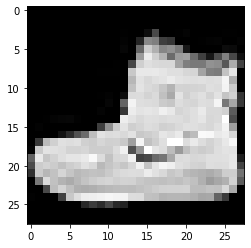

In [22]:
plt.imshow(trainX[0],cmap='gray')

In [17]:
print(trainY)

[9 0 0 ... 3 0 5]


In [23]:
class_name=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle']

# 1.모델 만들기  
최종 10개의 확률을 내줘야하므로 마지막 Dense는 10으로 합니다.  
relu를 통해 음수는 전부 0으로 만들어줍니다. Convolution layer에서 자주 씁니다.  
- sigmoid : 결과를 0~ 1로 압축합니다. binary 예측문제에 사용하죠. 대학원 붙는다 안붙는다 같은 문제에 말이죠 이때 마지막 노드 갯수는 1개입니다.
- softmax : 결과를 0~ 1로 압축합니다. 하지만 카테고리 예측문제에 사용하죠. 어떤 카테고리에 속할 확률이 높을까요에 쓰는 것입니다. 예측한 10개 확률을 다 더하면 1이 나오는 것입니다.

 

In [29]:
model=tf.keras.Sequential([
   tf.keras.layers.Dense(128,input_shape=(28,28),activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax"),
])


모델 아웃라인을 출력해 줄 수 있는 착한 함수가 있습니다.
다만 Dense 두번째 인자에 input_shape=(28,28)를 넣어줘야 summary 보기가 가능합니다.  

Param은 학습가능한 w,b의 개수입니다.

In [30]:
model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 28, 128)           3712      
_________________________________________________________________
dense_7 (Dense)              (None, 28, 64)            8256      
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                17930     
Total params: 29,898
Trainable params: 29,898
Non-trainable params: 0
_________________________________________________________________


trainY가 원핫인코딩 되어있을 때
>loss="categorical_crossentropy"  

trainY가 0,1,2..등 정수로 인코딩 되어있을 때
>loss="sparse_categorical_crossentropy"

In [31]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.fit(trainX,trainY,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 3.0425 - accuracy: 0.7353
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4831 - accuracy: 0.8323
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4476 - accuracy: 0.8451
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4241 - accuracy: 0.8523
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3885 - accuracy: 0.8611


이제 Convolutional Layer을 도입하죠.  
1. 이미지에서 중요한 정보를 추려서 복사본 20장을 만든다.(가로엣지, 세로엣지 등)
2. 그곳엔 이미지의 중요한 feature, 특성이 담겨있다.
3. 이걸로 학습을 합니다.  

이것을 흔히 feature extraction 이라고합니다.

## Feature map 만들기

1. 예를들어 세로선 강조 kernel을 사용하게되면, 창문 기둥 이런 특성을 쉽게 파악할 수 있게 됩니다.
2. 그러나 TF는 알아서 커널 16종을 적용해 줍니다.
3. Pooling layer(Down Sampling)을 해줍니다. Max Pooling을 통해 최댓값만 추립니다. 평균값은 잘 쓰지않고 Max pooling을 많이 씁니다. 

즉, Convolutional+Pooling layer를 도입하면 특징추출+특징을 가운데로 모아줍니다.

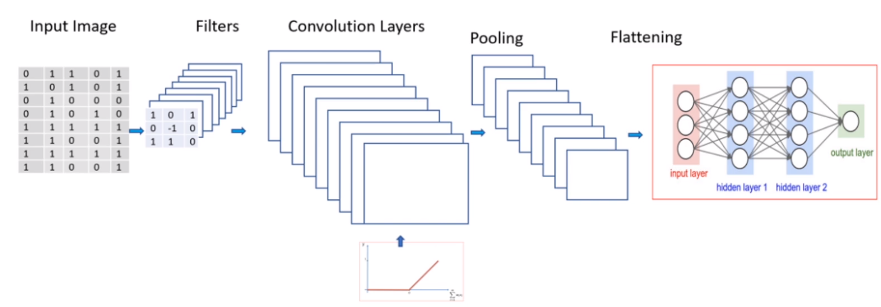
Filters+Convolution Layer+Pooling을 통해 Feature map을 만드는 것이죠

Con2D(32,(3,3))  
* 32 : 32개의 복사본을 만들어주세요  
* (3,3) 커널 사이즈
* padding="same" : 커널을 적용하면 이미지가 줄어드니 처음과 동일하도록 가로세로 1픽셀씩 다시 더해주세요. 그럼 28,28이 유지됩니다. 
* activation='relu' : 이미지는 음수가 없기에 음수는 다 0으로 맞추어주는 relu를 관습적으로 사용합니다.  
* Conv2D는 4차원의 데이터가 필요합니다. 따라서 reshape 해줍니다. 그냥 각 값에 [] 붙여주는거죠 !
* 이미지 데이터 전처리로 0~1로 압축해서 넣기위해 255로 나누어줍니다. 이건 선택사항입니다. 더 좋은 결과가 나오는 것으로 사용하세요.

In [32]:
trainX=trainX/255.0
testX=testX/255.0

In [33]:
trainX=trainX.reshape((trainX.shape[0],28,28,1))
testX=testX.reshape((testX.shape[0],28,28,1))

In [34]:
model=tf.keras.Sequential([
   tf.keras.layers.Conv2D(32,(3,3),padding="same",activation='relu',input_shape=(28,28,1) ),
   tf.keras.layers.MaxPooling2D((2,2)),
    
tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])


In [35]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.fit(trainX,trainY,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.5142 - accuracy: 0.8176
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2720 - accuracy: 0.9005
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2175 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1860 - accuracy: 0.9322
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1515 - accuracy: 0.9446


여기까지 수행하면 학습까지 완료된 상태입니다. 이제 모델이 제대로 됐는지 평가해줍니다. 다만 이때 학습데이터를 주면 안됩니다. 이미 답을 외워버렸을 수도 있죠. 그래서 생전 처음보는 테스트 데이터를 넣어주는 것입니다. 즉, 채점까지 해주는 것이죠.

In [36]:
score=model.evaluate(testX,testY)
print(score)

313/313 [==============================] - 1s 4ms/step - loss: 0.2493 - accuracy: 0.9135
[0.24933737516403198, 0.9135000109672546]


첫번째는 loss이고, 두번째는 accuracy 입니다. 하지만 마지막 epoch의 accuracy와 내 test epoch이 다릅니다. overfitting 현상이 일어난 것이죠. 그래서 epoch가 1회 끝날때마다 채점하는 방법이 있습니다.   
model.fit안에 validation_data=(X,Y) 를 넣어주는 것입니다.

In [37]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.fit(trainX,trainY,validation_data=(testX,testY),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1355 - accuracy: 0.9492 - val_loss: 0.2639 - val_accuracy: 0.9144
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1121 - accuracy: 0.9587 - val_loss: 0.2885 - val_accuracy: 0.9085
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0906 - accuracy: 0.9677 - val_loss: 0.3044 - val_accuracy: 0.9102
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0783 - accuracy: 0.9723 - val_loss: 0.2893 - val_accuracy: 0.9165
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0652 - accuracy: 0.9770 - val_loss: 0.3415 - val_accuracy: 0.9136


 이렇게 하면 학습을 100, 1000개, 10000개 할때 overfitting이 일어날 수 있는데, 그때 딱 정지를 시키고 그때의 모델을 뽑는 것입니다.  
 저희는 val_accuracy(validation accuracy)를 높일 방법을 찾습니다.   
 1. Dense Layer를 추가하나요?  
 2. Conv+Pooling을 추가하나요?  
 
 한번 고민해 봅시다.